In [1]:
# Import necessary libraries
from google.colab import drive
import os
from tqdm import tqdm
from PIL import Image
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

In [2]:
# 1. Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 2. Define the path to the image folder
image_folder_path = '/content/drive/MyDrive/dataset/Encrypted_Images2'

In [4]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
from PIL import Image

In [5]:
# Function to load a limited number of images from a folder and resize them to (64, 64)
def load_images_from_folder(folder, size=(180, 180), limit=8100):
    images = []
    filenames = []
    for i, filename in enumerate(tqdm(os.listdir(folder), desc="Loading images")):
        if i >= limit:  # Stop after reaching the specified limit
            break
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensure the image is in RGB format
            img = img.resize(size, Image.Resampling.LANCZOS)  # Replace Image.ANTIALIAS with Image.Resampling.LANCZOS
            img_array = np.array(img)
            images.append(img_array)
            filenames.append(filename)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return np.array(images), filenames

In [6]:
# Load and preprocess images
images, filenames = load_images_from_folder(image_folder_path, size=(180, 180), limit=4100)


Loading images: 100%|██████████| 4100/4100 [01:58<00:00, 34.69it/s] 


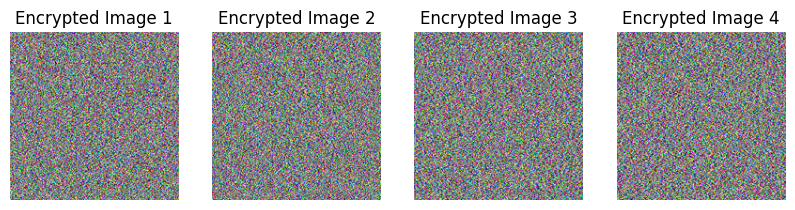

In [7]:
# Display 4 encrypted images
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(10, 10))
for i in range(n):
    # Encrypted image
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(images[i])
    plt.title(f"Encrypted Image {i + 1}")
    plt.axis("off")
plt.show()

In [8]:
import cv2
import numpy as np

# Load the original image
image = cv2.imread('/content/drive/MyDrive/dataset/Decrypted_Images2/decrypted_image_1.bmp')  # Replace with the actual image path


# Find the maximum intensity in the encrypted image
max_intensity = np.max(image)

print("Maximum pixel intensity after encryption:", max_intensity)


Maximum pixel intensity after encryption: 255


In [9]:
# Normalize the images
images = images.astype('float32') / 256.0

In [10]:
# Split data into training and validation sets (90% training, 10% validation)
split_index = int(0.8 * len(images))
train_images = images[:split_index]
val_images = images[split_index:]

In [11]:
# Import necessary modules
from tensorflow.keras import layers, models, optimizers, losses, callbacks

In [14]:
from tensorflow.keras import layers, models

# Define the input shape for 32x32 RGB images
input_img = layers.Input(shape=(180, 180, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
output_img = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder model
autoencoder = models.Model(input_img, output_img)


# Optimizer with custom learning rate
learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate=learning_rate)

# Compile the model with custom loss
autoencoder.compile(optimizer=optimizer, loss=losses.MeanSquaredError(), metrics=['accuracy'])

# Model summary
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 180, 180, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Training the autoencoder (assuming `train_images` and `val_images` are already defined and normalized)
history = autoencoder.fit(train_images, train_images, epochs=20, batch_size=64,
                          validation_data=(val_images, val_images))

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 505s 10s/step - accuracy: 0.3376 - loss: 0.0434 - val_accuracy: 0.3780 - val_loss: 0.0432
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 502s 10s/step - accuracy: 0.3900 - loss: 0.0426 - val_accuracy: 0.4245 - val_loss: 0.0413
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 497s 10s/step - accuracy: 0.4252 - loss: 0.0413 - val_accuracy: 0.4367 - val_loss: 0.0407
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 497s 9s/step - accuracy: 0.4377 - loss: 0.0407 - val_accuracy: 0.4442 - val_loss: 0.0402
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 506s 10s/step - accuracy: 0.4471 - loss: 0.0403 - val_accuracy: 0.4572 - val_loss: 0.0400
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 507s 10s/step - accuracy: 0.4402 - loss: 0.0407 - val_accuracy: 0.4661 - val_loss: 0.0395
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 505s 10s/step - accuracy: 0.4715 - loss: 0.0394 - val_accuracy: 0.4832 - val_loss: 0.0387
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 550s 9s/step - accuracy: 0.4813 - loss: 0.0389 - val_accuracy: 0.49

KeyboardInterrupt: 

In [16]:
import matplotlib.pyplot as plt

# Predict reconstructed images
reconstructed_images = autoencoder.predict(val_images)

26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


In [17]:
image1 = (reconstructed_images * 256).astype('uint8')

In [ ]:
# Visualize the source, encrypted, and decrypted images
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original (Source) image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(image1[i].astype('uint8'))
    plt.title("Source Image")
    plt.axis("off")



    # Decrypted (Reconstructed) image
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(decrypted_images[i].astype('uint8'))
    plt.title("Decrypted Image")
    plt.axis("off")

plt.show()